In [1]:
#Dataset imports
import yfinance as yf

#Standard imports
import pandas as pd
import numpy as np

#Visualization imports
from matplotlib import pyplot as plt
import seaborn as sns

#Model imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Metrics imports
from sklearn.metrics import confusion_matrix, accuracy_score

#To hide warnings
import warnings
warnings.filterwarnings('ignore')

import math



In [2]:
# Importing the historical prices

ticker = "ORCL"
start_date = "2022-06-22"
end_date = "2023-06-22"
df = yf.download(ticker, start_date, end_date)
# new.to_csv('Dataset.csv')
# df = pd.read_csv('Dataset.csv')

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-22,66.930000,67.570000,66.379997,66.529999,65.146492,8219900
2022-06-23,66.449997,67.870003,66.309998,67.629997,66.223618,8775800
2022-06-24,68.330002,70.779999,67.970001,70.699997,69.229767,20132600
2022-06-27,69.370003,70.849998,68.940002,70.410004,68.945808,8840600
2022-06-28,70.570000,71.070000,68.529999,68.580002,67.153854,7252100
...,...,...,...,...,...,...
2023-06-14,116.500000,122.510002,115.739998,122.269997,121.842400,26264200
2023-06-15,121.949997,127.540001,121.660004,126.550003,126.107445,27476700
2023-06-16,127.139999,127.400002,125.150002,125.459999,125.021248,19511500


In [3]:
df.shape

(251, 6)

# Removing unwanted columns

In [4]:
df = df.drop(columns=['Adj Close'])

# Checking for NULL and duplicate values

In [5]:
df.duplicated().sum().any()

False

In [6]:
df.isnull().values.any()

False

# Checking the DataFrame

In [7]:
df.index

DatetimeIndex(['2022-06-22', '2022-06-23', '2022-06-24', '2022-06-27',
               '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01',
               '2022-07-05', '2022-07-06',
               ...
               '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-12',
               '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16',
               '2023-06-20', '2023-06-21'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-06-22 to 2023-06-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Close   251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [9]:
df.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,83.358884,84.360757,82.611235,83.570598,8.231682e+06
std,12.453277,12.627331,12.369649,12.542082,4.849350e+06
min,60.990002,62.139999,60.779999,61.070000,2.754900e+06
25%,74.810001,75.875000,74.290001,74.965000,5.674300e+06
50%,81.330002,82.209999,80.610001,81.500000,7.053000e+06
75%,89.505001,90.494999,88.750000,89.719997,8.818400e+06
max,127.139999,127.540001,125.150002,126.550003,3.919090e+07


# Checking and Visualizing correlation

In [10]:
#using .corr to check the correlation
print(df.corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.997662  0.997933  0.994561  0.273374
High    0.997662  1.000000  0.997306  0.997820  0.301059
Low     0.997933  0.997306  1.000000  0.997699  0.252214
Close   0.994561  0.997820  0.997699  1.000000  0.273024
Volume  0.273374  0.301059  0.252214  0.273024  1.000000


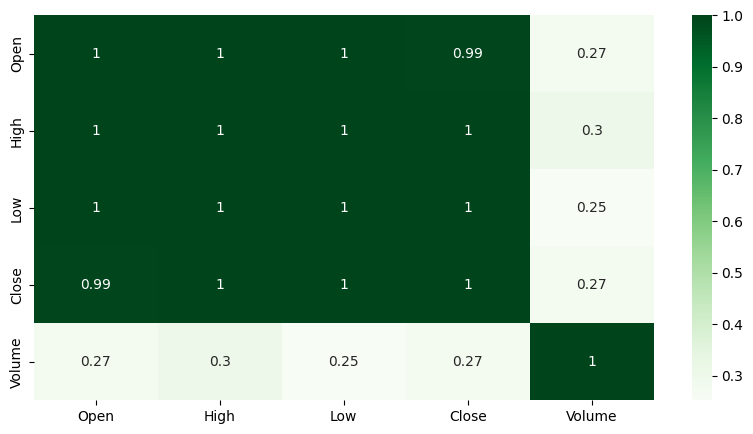

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap="Greens", annot=True)
plt.show()

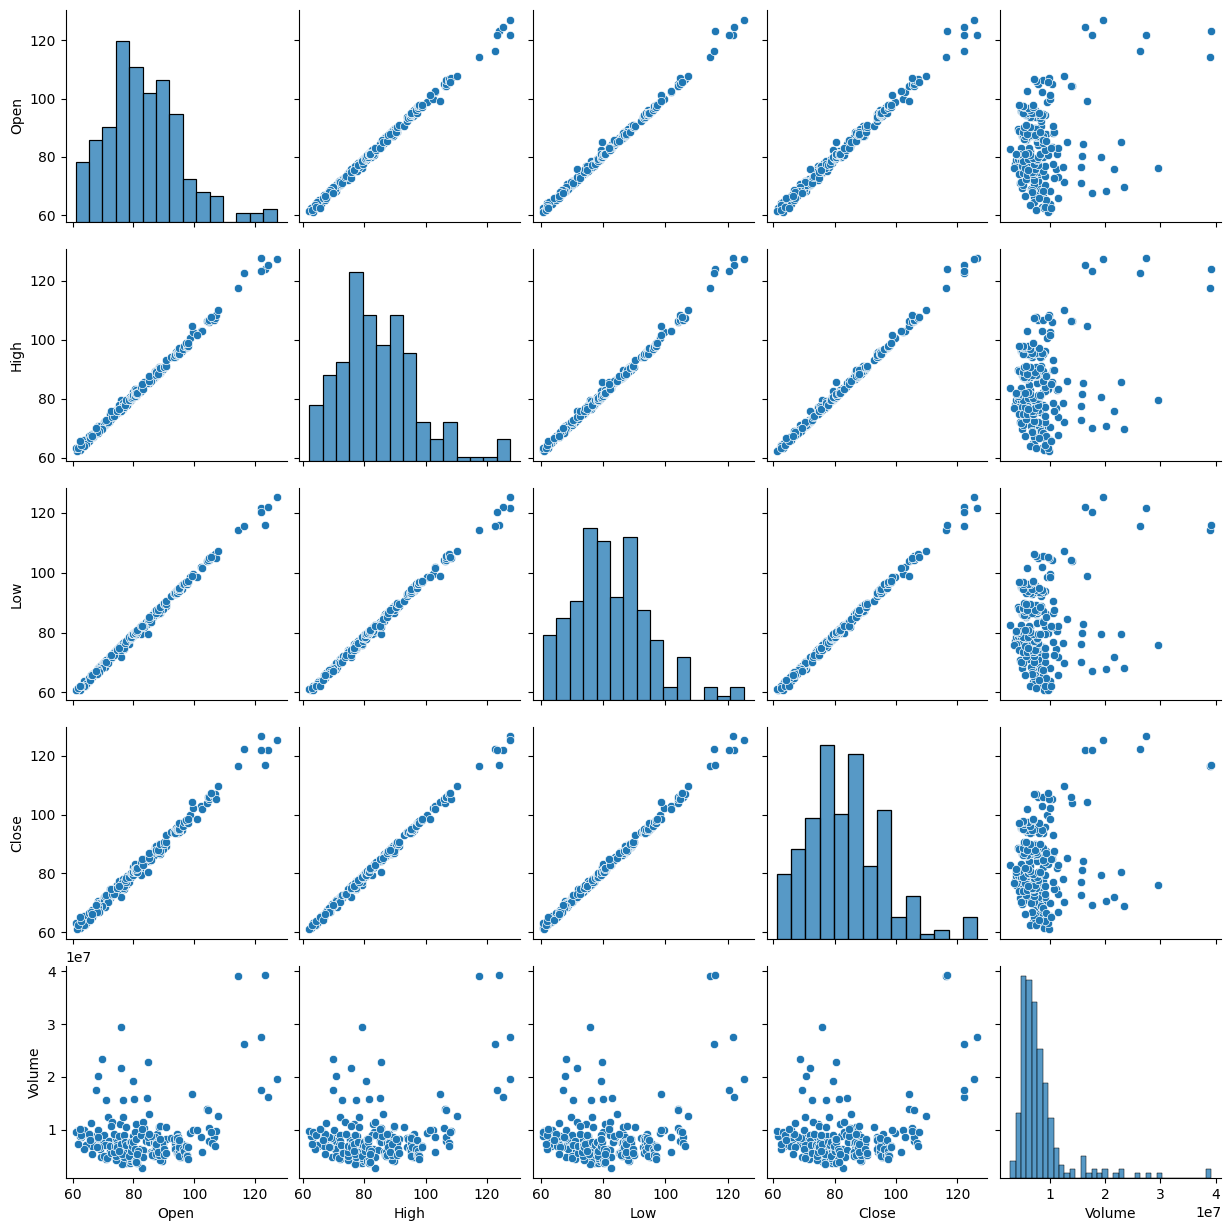

In [12]:
sns.pairplot(df)

# Train-Test Split (80-20)

In [13]:
#Splitting the dataset
X = df[['Open', 'High', 'Low', 'Volume']] #Independent Variables
y = df[['Close']] #Dependednt Variables

#using train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
print(X_train.shape)
print(X_test.shape)

(200, 4)
(51, 4)


In [15]:
#training set
print(X_train.describe())
print()
print(y_train.describe())

             Open        High         Low        Volume
count  200.000000  200.000000  200.000000  2.000000e+02
mean    83.400950   84.440600   82.691150  8.366630e+06
std     12.635591   12.871030   12.638521  4.814375e+06
min     61.259998   62.139999   60.779999  2.754900e+06
25%     74.715000   75.610003   74.047503  5.675550e+06
50%     81.109997   82.035000   80.400002  7.146900e+06
75%     89.520000   90.537500   88.992498  9.000275e+06
max    127.139999  127.540001  125.150002  3.908150e+07

            Close
count  200.000000
mean    83.660600
std     12.860709
min     61.070000
25%     74.672501
50%     81.340000
75%     89.835001
max    126.550003


In [16]:
#test set
print(X_test.describe())
print()
print(y_test.describe())

             Open        High         Low        Volume
count   51.000000   51.000000   51.000000  5.100000e+01
mean    83.193921   84.047647   82.297843  7.702476e+06
std     11.829885   11.738042   11.365793  4.997319e+06
min     60.990002   63.240002   60.810001  3.523400e+06
25%     75.705002   76.735001   75.160000  5.681150e+06
50%     82.110001   82.889999   81.070000  6.485100e+06
75%     89.105000   89.735001   88.275002  8.646600e+06
max    123.320000  123.989998  116.019997  3.919090e+07

            Close
count   51.000000
mean    83.217647
std     11.317076
min     62.570000
25%     76.040001
50%     82.120003
75%     89.399998
max    116.680000


# Training the Model

In [17]:
model = LinearRegression() # Creating an object
model = model.fit(X_train, y_train)

#Using the model to predict values
y_pred = model.predict(X_test)

y_pred

array([[ 88.06280353],
       [ 82.37443016],
       [ 77.2364639 ],
       [ 86.56594302],
       [ 88.94065847],
       [ 89.20479629],
       [ 87.3131698 ],
       [ 66.48384562],
       [ 67.15449742],
       [ 86.90778797],
       [ 89.66423743],
       [ 99.13099236],
       [ 82.49515012],
       [ 87.04434922],
       [ 78.61216484],
       [ 66.62700586],
       [ 95.19756642],
       [ 95.38661473],
       [ 88.7753006 ],
       [ 76.45430619],
       [ 88.65632485],
       [ 76.54521945],
       [105.97916792],
       [ 80.75777129],
       [ 95.55670009],
       [ 77.40281828],
       [ 71.58107495],
       [ 75.62776673],
       [117.19634207],
       [ 79.06715913],
       [ 90.1556363 ],
       [ 62.48009959],
       [ 81.2147422 ],
       [102.50287952],
       [ 96.36281974],
       [ 85.36447911],
       [ 86.74835667],
       [ 69.67551018],
       [ 74.6978293 ],
       [ 81.20803457],
       [ 79.57528749],
       [ 71.76924871],
       [ 81.88900868],
       [ 94

In [18]:
#y_pred is a numpy array and y_test is a data frame

# Validating the Fit

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("Intercept", model.intercept_)


Model Coefficients: [[-7.62427535e-01  9.62291246e-01  8.00775220e-01 -2.51694116e-08]]
Mean Absolute Error: 0.3063849673894357
Coefficient of Determination: 0.9988790937528166
Root Mean Squared Error: 0.3751619576497732
Intercept [-0.01511066]


<AxesSubplot:title={'center':'Distribution of Residuals'}, ylabel='Density'>

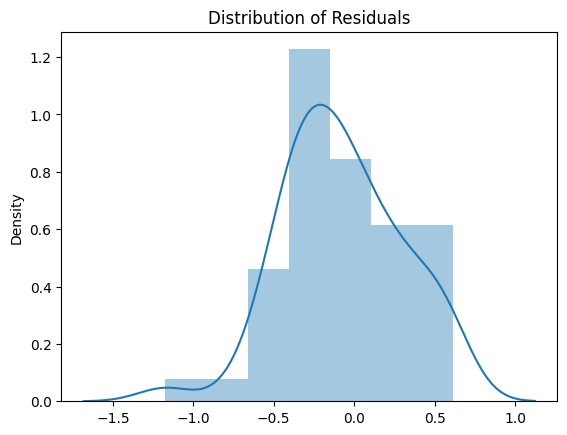

In [20]:
#Residual Plot
residual_model = y_pred - y_test
# plt.subplots(figsize=(6, 3))
plt.title("Distribution of Residuals")
sns.distplot(residual_model)

# Combining Data Frames

In [21]:
comparison = y_test

In [22]:
comparison['Predictions'] = y_pred

In [23]:
comparison = comparison.rename(columns={"Close": "Actual_Price","Predictions": "Predicted_Price"})
comparison.head(10)

,Actual_Price,Predicted_Price
Date,,
2023-01-31,88.459999,88.062804
2022-12-14,81.820000,82.374430
2022-11-01,77.110001,77.236464
2023-02-07,87.739998,86.565943
2023-01-25,89.639999,88.940658
2023-02-13,89.419998,89.204796
2023-01-30,87.349998,87.313170
2022-10-19,66.300003,66.483846
2022-09-21,66.750000,67.154497


# Visualizing Actual v/s Predicted Values

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

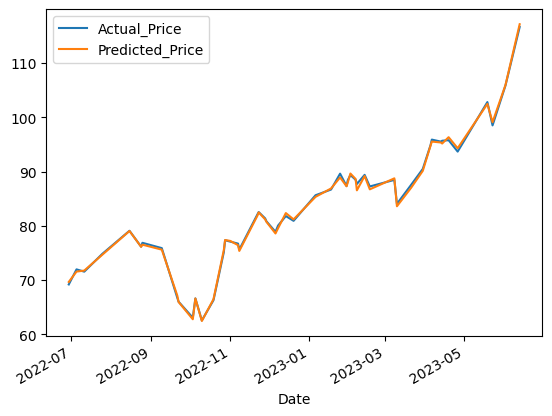

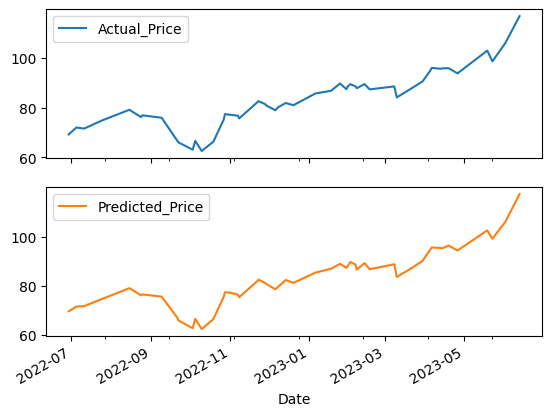

In [24]:
# comparison .plot.line(color={"Actual_Price":"blue", "Predicted_Price":"black"})
comparison.plot.line()
comparison.plot.line(subplots=True)

<AxesSubplot:xlabel='Date'>

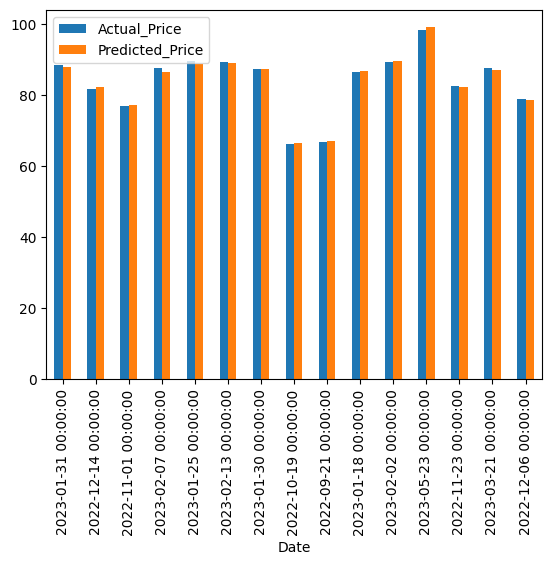

In [25]:
graph = comparison.head(15)
graph.plot(kind='bar')

In [26]:
x2=abs(y_pred-y_test)
x2 = x2.drop(['Predictions'], axis=1)

In [27]:
y_test = y_test.drop(['Predictions'], axis = 1)

In [28]:
y2 = 100 * (x2/y_test)
accuracy = 100 - np.mean(y2)
print('Accuracy: ', round(accuracy,2), '%')

Accuracy:  Close    99.64
dtype: float64 %


# Strategy Checking

In [29]:
ticker = "ORCL"
start_date = "2023-01-22"
end_date = "2023-06-22"
new = yf.download(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [30]:
new = new.drop(['Adj Close'], axis=1)

In [31]:
new

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-23,87.190002,89.129997,86.970001,88.970001,7390200
2023-01-24,89.050003,90.099998,88.000000,89.699997,7004600
2023-01-25,88.699997,89.860001,87.739998,89.639999,5896800
2023-01-26,89.889999,90.489998,89.089996,89.830002,7302800
2023-01-27,89.500000,89.720001,88.959999,88.989998,5676800
...,...,...,...,...,...
2023-06-14,116.500000,122.510002,115.739998,122.269997,26264200
2023-06-15,121.949997,127.540001,121.660004,126.550003,27476700
2023-06-16,127.139999,127.400002,125.150002,125.459999,19511500


In [32]:
print(new)
new=new.iloc[10:]
new

                  Open        High         Low       Close    Volume
Date                                                                
2023-01-23   87.190002   89.129997   86.970001   88.970001   7390200
2023-01-24   89.050003   90.099998   88.000000   89.699997   7004600
2023-01-25   88.699997   89.860001   87.739998   89.639999   5896800
2023-01-26   89.889999   90.489998   89.089996   89.830002   7302800
2023-01-27   89.500000   89.720001   88.959999   88.989998   5676800
...                ...         ...         ...         ...       ...
2023-06-14  116.500000  122.510002  115.739998  122.269997  26264200
2023-06-15  121.949997  127.540001  121.660004  126.550003  27476700
2023-06-16  127.139999  127.400002  125.150002  125.459999  19511500
2023-06-20  124.449997  125.250000  121.959999  122.040001  16273000
2023-06-21  121.949997  123.360001  120.360001  122.099998  17583000

[104 rows x 5 columns]


,Open,High,Low,Close,Volume
Date,,,,,
2023-02-06,89.510002,89.610001,88.400002,88.529999,4097200
2023-02-07,87.870003,88.019997,86.300003,87.739998,9226000
2023-02-08,86.930000,87.919998,86.510002,86.690002,7624400
2023-02-09,87.139999,87.900002,86.330002,86.650002,4960300
2023-02-10,86.529999,87.379997,86.339996,87.139999,5318400
...,...,...,...,...,...
2023-06-14,116.500000,122.510002,115.739998,122.269997,26264200
2023-06-15,121.949997,127.540001,121.660004,126.550003,27476700
2023-06-16,127.139999,127.400002,125.150002,125.459999,19511500


In [33]:
#Predicting the values
predictor = new.drop(['Close'], axis=1)
my_pred = model.predict(predictor)

In [34]:
new['Predicted Values']=my_pred

In [35]:
print(new)
new=new.drop(['High', 'Low', 'Volume'], axis=1)
new

                  Open        High         Low       Close    Volume  \
Date                                                                   
2023-02-06   89.510002   89.610001   88.400002   88.529999   4097200   
2023-02-07   87.870003   88.019997   86.300003   87.739998   9226000   
2023-02-08   86.930000   87.919998   86.510002   86.690002   7624400   
2023-02-09   87.139999   87.900002   86.330002   86.650002   4960300   
2023-02-10   86.529999   87.379997   86.339996   87.139999   5318400   
...                ...         ...         ...         ...       ...   
2023-06-14  116.500000  122.510002  115.739998  122.269997  26264200   
2023-06-15  121.949997  127.540001  121.660004  126.550003  27476700   
2023-06-16  127.139999  127.400002  125.150002  125.459999  19511500   
2023-06-20  124.449997  125.250000  121.959999  122.040001  16273000   
2023-06-21  121.949997  123.360001  120.360001  122.099998  17583000   

            Predicted Values  
Date                          
2

,Open,Close,Predicted Values
Date,,,
2023-02-06,89.510002,88.529999,88.656325
2023-02-07,87.870003,87.739998,86.565943
2023-02-08,86.930000,86.690002,87.394873
2023-02-09,87.139999,86.650002,87.138435
2023-02-10,86.529999,87.139999,87.102111
...,...,...,...
2023-06-14,116.500000,122.269997,121.073052
2023-06-15,121.949997,126.550003,126.468224
2023-06-16,127.139999,125.459999,125.371686


In [36]:
new.to_csv('Model_1_Predictions.csv')